<a href="https://colab.research.google.com/github/twinklegithub/HDS5210_InClass/blob/master/week09/week09_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [32]:
data.shape

(3864, 19)

In [33]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [34]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

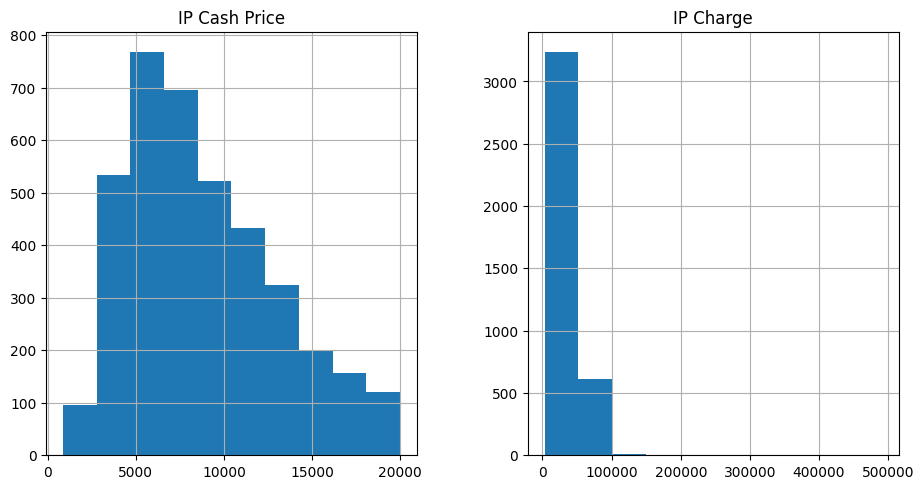

In [35]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

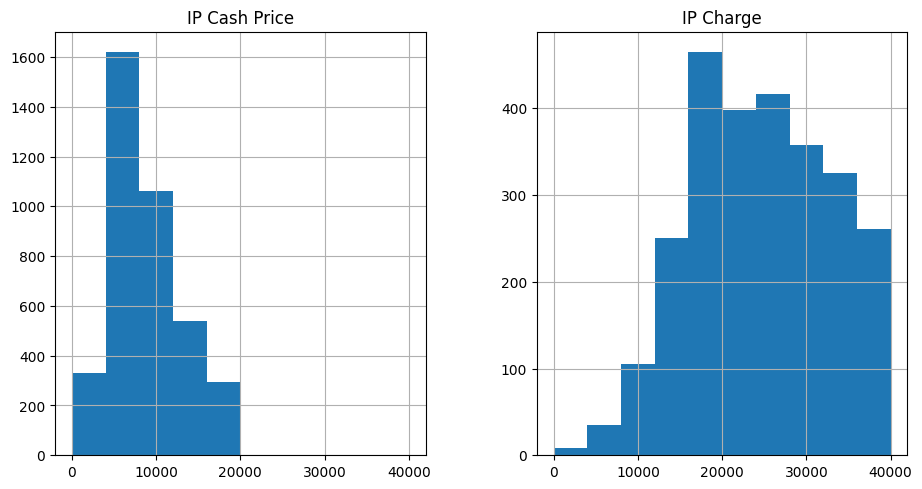

In [36]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [37]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

.### YOUR RESPONSE:

The distribution of "IP Cash Price" on the left and "IP Charge" on the right is shown by the two histograms in the picture. The "IP Charge" has a larger range of values and contains greater values than the "IP Cash Price," indicating that charges are typically higher than cash prices.
"IP Cash Price" is more concentrated in the lower price ranges, whereas "IP Charge" displays a wider and higher distribution of values, despite the fact that both histograms display right-skewed distributions. This could suggest that cash pricing for services are typically less than what is charged.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

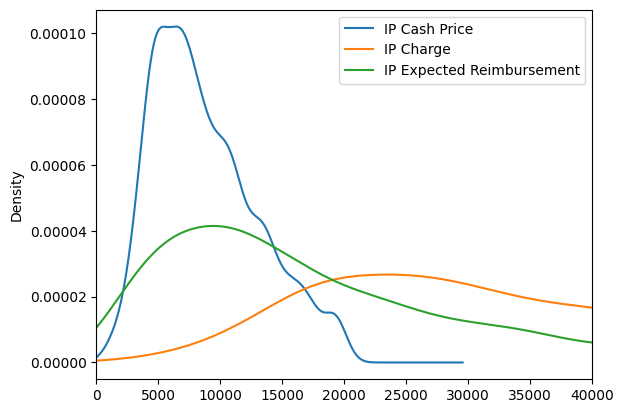

In [38]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
The distributions of "IP Cash Price," "IP Charge," and "IP Expected Reimbursement" can be visually compared using the KDE plot. According to the descriptions, "IP Charge" usually displays the highest numbers, signifying the utmost amount that can be billed, while "IP Expected Reimbursement" is smaller and indicates the amount that the hospital anticipates getting from insurance companies. The "IP Cash Price," which represents the amount that patients without insurance must pay out of pocket, may be in the middle or less. Finding trends in the plot, such as differences between predicted and billed payments, may reveal disparities between hospital charges and agreed insurance rates or out-of-pocket expenses for patients without insurance. Focusing on the bulk of data points inside the specified range of 0 to 40,000 is made easier.I see the brilliance behind this data.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [39]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [40]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


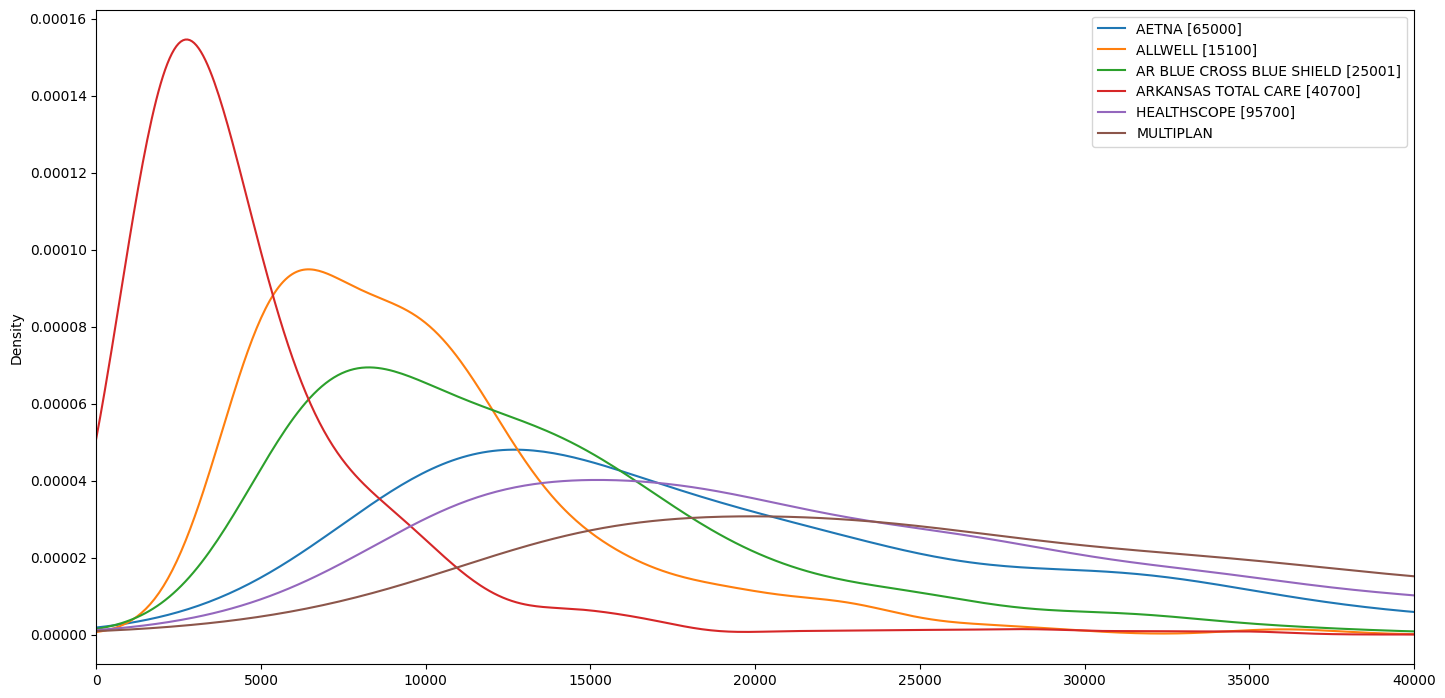

In [41]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE
ALLWELL has the lowest reimbursement rates, with most reimbursements clustering below 5,000.
AETNA, AR BLUE CROSS BLUE SHIELD, and ARKANSAS TOTAL CARE represent mid-tier reimbursement plans, peaking around 10,000 to 20,000.
MULTIPLAN and HEALTHSCOPE tend to reimburse much higher amounts, with their density curves peaking in the 25,000 to 30,000 range.
This tells us that different plans are targeting different levels of reimbursement, with some plans (like ALLWELL) offering lower typical reimbursements, while others (like MULTIPLAN and HEALTHSCOPE) tend to offer higher reimbursements. The wider distribution in some plans also suggests more variability in how much is reimbursed for different services.

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

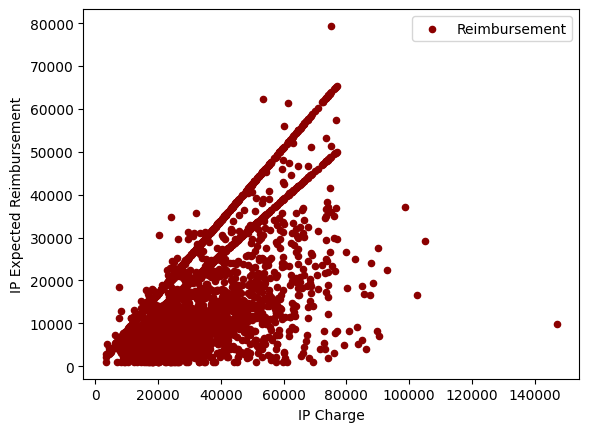

In [42]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

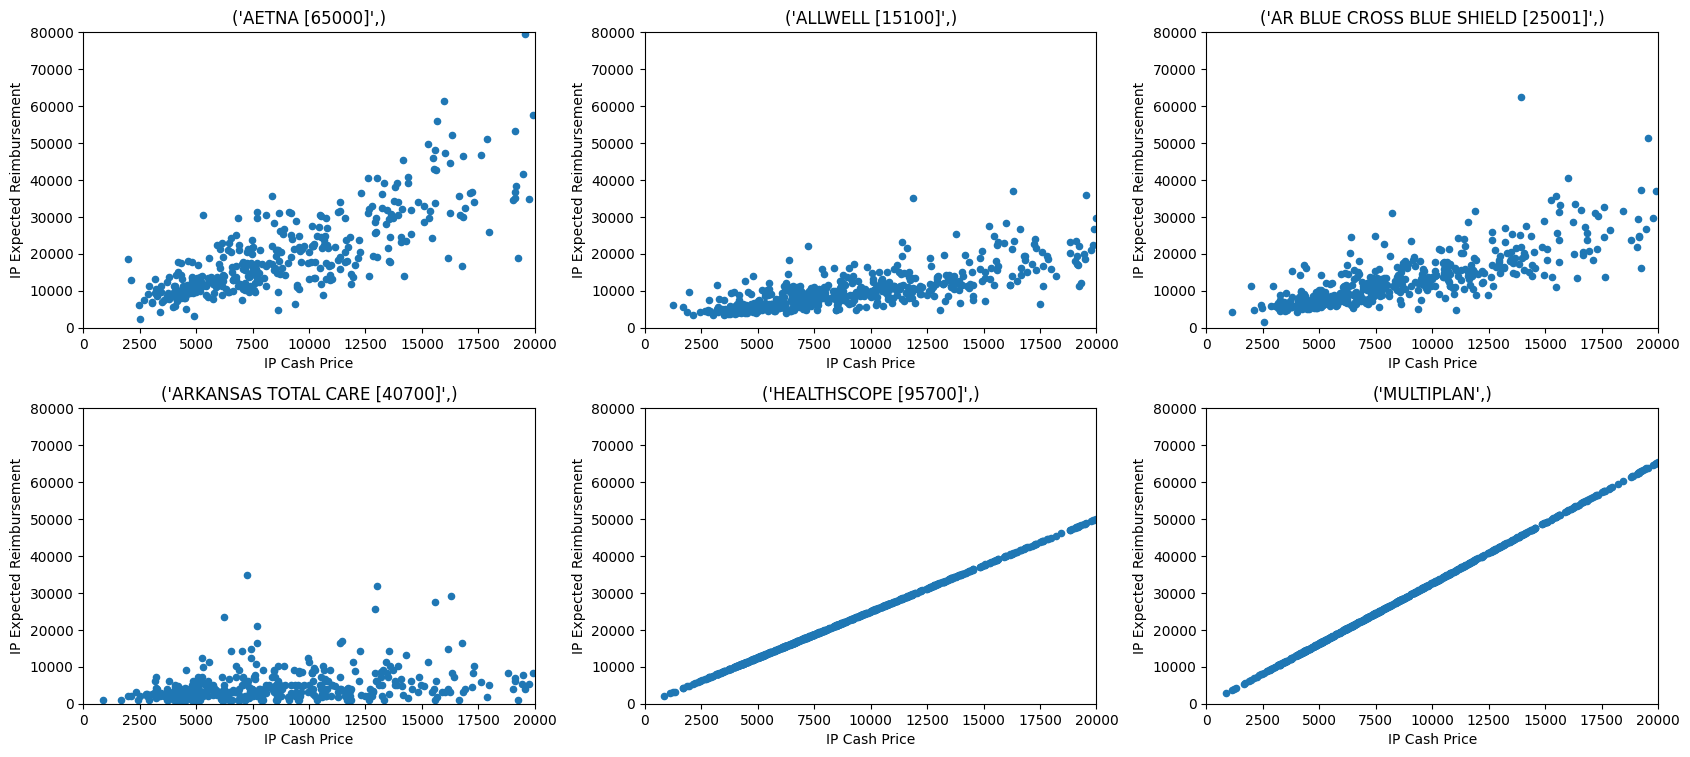

In [43]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

image showing a scatterplot of IP Charges (inpatient charges) versus IP Expected Reimbursement. This is already a basic visualization of the correlation between cash prices (IP Charges) and insurance-paid prices (Expected Reimbursement).To analyze the strength of this correlation, a scatterplot gives a good first impression, but a more precise method would be calculating the correlation coefficient (such as Pearson's r). A value closer to 1 or -1 would indicate a strong linear relationship, while a value near 0 indicates weak or no linear relationship.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '///content/HIV_Early_Infant_Diagnosis.csv'
data = pd.read_csv('///content/HIV_Early_Infant_Diagnosis.csv')

# Convert the 'Year' and 'Value' columns to numeric for plotting purposes
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Filter data for one country to keep the visualization simpler (e.g., Angola)
angola_data = data[data['Country'] == 'Angola']


### Observations #1

Plotting percentage values with time, the graph illustrates the progress of HIV early newborn diagnosis in Angola between 2010 and 2015. The following are some important findings:

Significant Increase in 2011: In 2011, the proportion of early HIV diagnoses in infants increased significantly, surpassing 400%. This implies that testing or diagnosing efforts increased significantly this year.

Unexpected Decline in 2012: After reaching its highest point in 2011, there is a sharp decline in 2012, with the percentage dropping to almost zero. This might point to a major decline in HIV diagnoses or a hiccup in the diagnosis process.

Stable Low Trend After 2012: The percentage stays comparatively low after 2012, with very little variations until 2015. This time frame implies stability, however

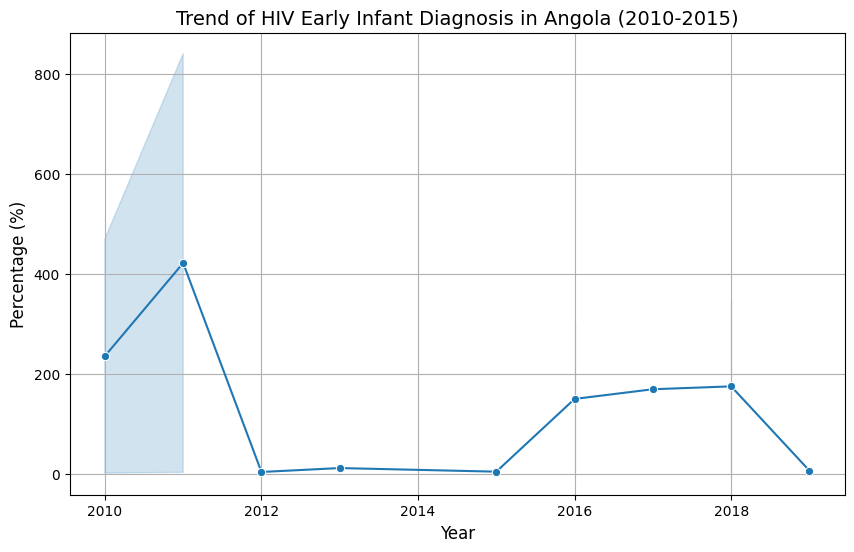

In [45]:
# Your code here to do a first visualization...

# Filter data for one country to keep the visualization simpler (e.g., Angola)
angola_data = data[data['Country'] == 'Angola']

# Visualization 1: Trend of HIV diagnosis percentage over the years for Angola
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=angola_data, marker='o')
plt.title('Trend of HIV Early Infant Diagnosis in Angola (2010-2015)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True)

### Observations #2

The distribution of HIV diagnosis percentages in Angola between 2010 and 2015 is depicted in the boxplot chart.The diagnostic % varies significantly between 2010 and 2011, with 2010 having a lower median value and 2011 displaying the biggest variability and maximum diagnosis rate.
2012–2015: There is little fluctuation and a notable decline. The diagnosis percentages for 2013, 2014, and 2015 are either nonexistent or very low.
2016: Although the distribution is more constrained than in 2010 and 2011, the diagnostic % increased after 2015.
2018: Displaying a moderate range in percentage, just like 2016.
2019: Nearly zero percent of cases are diagnosed.
In conclusion, the percentages of HIV diagnoses vary greatly in the first half of the decade, declining sharply and with little activity from 2012 to 2015 before slightly increasing from 2016 onward.

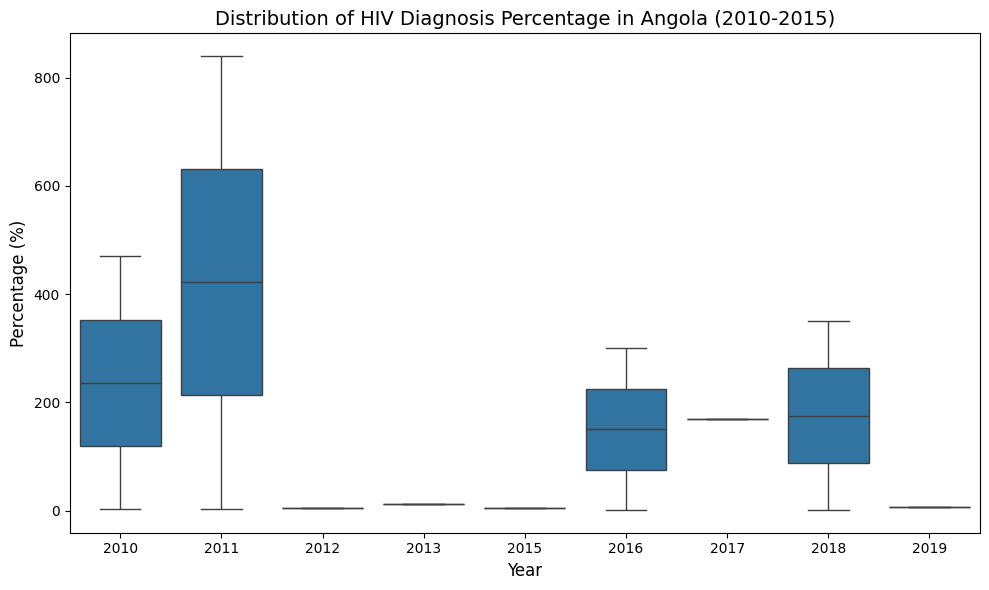

In [46]:
# Visualization 2: Distribution of HIV diagnosis percentages across all years for Angola
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Value', data=angola_data)
plt.title('Distribution of HIV Diagnosis Percentage in Angola (2010-2015)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show both plots
plt.tight_layout()
plt.show()



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option